In [1]:
# import libraries for EDA and Visaulization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

# import libraries for Machine learning


# Data Inspection and Data cleaning
# Task
* import dataset
* Understanding/Inspecting Dataset
* Data Cleaning
  

# Load the data 

In [2]:
RAW_DATASET_DIR = Path("../dataset/Algerian_forest_fires.csv")
CLEANED_DATASET_DIR = Path("../dataset/Algerian_forest_fires_CLEANED.csv")

In [3]:
# desplay the top  5 records 

df = pd.read_csv(RAW_DATASET_DIR)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# desplay the last 5 records 
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [5]:
# Rename the columns 
df.columns = [col.upper() for col in df.columns]

In [6]:
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
# check the shape of the dataset
df.shape

(243, 15)

In [8]:
# check for duplicates
number_of_duplicate = df.duplicated().sum()
print(f"number of duplicates is {number_of_duplicate}")

number of duplicates is 0


In [9]:
num_of_miss = df.isnull().sum()
percent_of_miss =df.isnull().sum() / len(df)

In [10]:
missing_report ={

    "missing count": num_of_miss,
    "missig %": percent_of_miss
}

pd.DataFrame(missing_report)

,missing count,missig %
DAY,0,0.0
MONTH,0,0.0
YEAR,0,0.0
TEMPERATURE,0,0.0
RH,0,0.0
WS,0,0.0
RAIN,0,0.0
FFMC,0,0.0
DMC,0,0.0
DC,0,0.0


In [11]:
# check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          243 non-null    int64  
 1   MONTH        243 non-null    int64  
 2   YEAR         243 non-null    int64  
 3   TEMPERATURE  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   WS           243 non-null    int64  
 6   RAIN         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  CLASSES      243 non-null    object 
 14  REGION       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [12]:
def uniques_feature(cols: list) -> str:
    for col in cols:
        print(f"Feature name {col}")
        print(f"Unique value {df[col].unique()}")
        print("="*30)

colunms = df.columns

uniques_feature(cols=colunms)

Feature name DAY
Unique value [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Feature name MONTH
Unique value [6 7 8 9]
Feature name YEAR
Unique value [2012]
Feature name TEMPERATURE
Unique value [29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]
Feature name RH
Unique value [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]
Feature name WS
Unique value [18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]
Feature name RAIN
Unique value [ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]
Feature name FFMC
Unique value [65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89

In [13]:
# clean the colunm class
df["CLASSES"]= df["CLASSES"].str.strip()

In [14]:
df["CLASSES"].unique()

array(['not fire', 'fire'], dtype=object)

In [15]:
df["CLASSES"].value_counts()

CLASSES
fire        137
not fire    106
Name: count, dtype: int64

In [16]:
bejaia_region = df["REGION"] == 0

df.where(bejaia_region)

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Observation***
- There are 243 records of Bejaia region

In [17]:
# save the cleaned DataFrame to csv
df.to_csv(CLEANED_DATASET_DIR, index=False)

## Explore Dataset

In [18]:
# load the Data 
df = pd.read_csv("CLEANED_DATASET_DIR.csv", index_col=0)

In [19]:
#check the top 5 records
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
#descriptive stat
df.describe()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,REGION
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Featurs Distributions

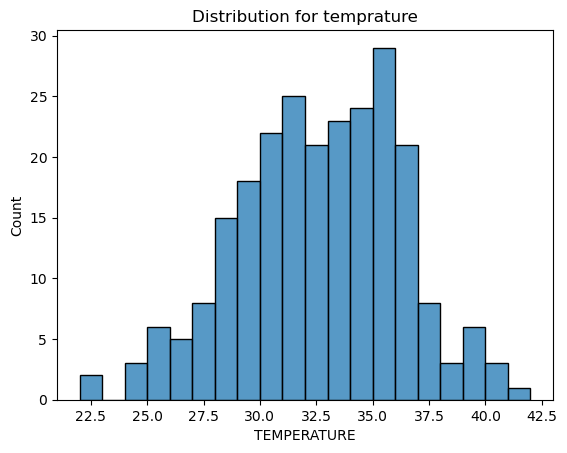

In [23]:
# plot the TEMPRATURE COLUMN
sns.histplot(data=df["TEMPERATURE"], bins=20)
plt.title("Distribution for temprature")
plt.show()

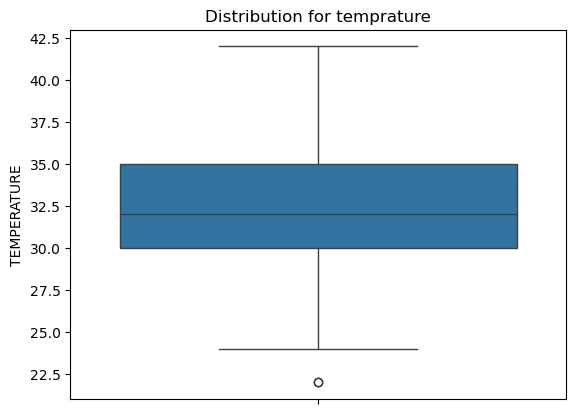

In [25]:
# distribution histograph
sns.boxplot(data=df["TEMPERATURE"])
plt.title("Distribution for temprature")
plt.show()

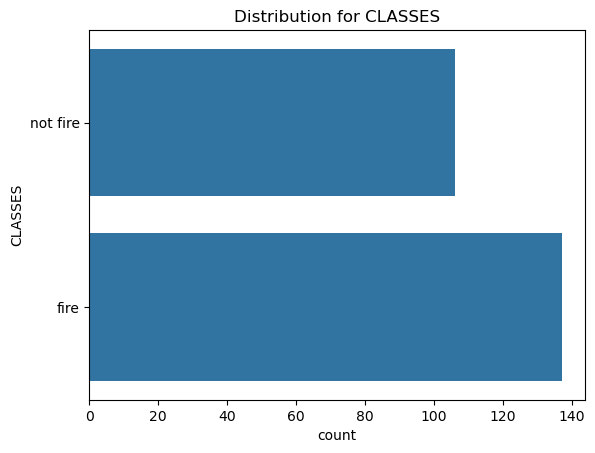

In [27]:
# plot a countplot for the classes 
sns.countplot(data=df['CLASSES'])
plt.title("Distribution for CLASSES")
plt.show()

In [ ]:
classes = df["CLASSES"]

plt.figure(figsize=(12, 7))
plt.pie(X=df["CLASSES"], labels=)